In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

In [2]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [3]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [4]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [5]:
y = df['Satisfaction_Score']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [7]:
#Instantiate pipeline and its respective eleemnts
gb = GradientBoostingClassifier(random_state=42, verbose=1)
param_grid = {
    'learning_rate': [0.1, 0.25, 0.5, 0.75],
    'n_estimators': np.arange(10,110,20),
    'max_depth': np.arange(5,115,20),
    'min_samples_split': np.arange(2,127,25)
}

In [8]:
from IPython.display import Audio
sound_file = 'http://www.soundjay.com/button/beep-07.wav'
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(gb, param_grid, n_iter=65)
cv
Audio(sound_file, autoplay=True)

In [9]:
begin_time = datetime.datetime.now()
cv.fit(x_train, y_train)
Audio(sound_file, autoplay=True)

C:\Users\SiddharthaMisra\Anaconda3\envs\capstone2\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


      Iter       Train Loss   Remaining Time 
         1        3894.3375            1.45m
         2        3713.9085            2.09m
         3 66073241411817462755869388162586471913436569939021263798272.0000            2.12m
         4 66073241411817462755869388162586471913436569939021263798272.0000            2.10m
         5 66073241411817462755869388162586471913436569939021263798272.0000            2.05m
         6 66073241411817462755869388162586471913436569939021263798272.0000            2.00m
         7 66073241411817462755869388162586471913436569939021263798272.0000            1.93m
         8 66073241411817462755869388162586471913436569939021263798272.0000            1.90m
         9 66073241411817462755869388162586471913436569939021263798272.0000            1.94m
        10 66073241411817462755869388162586471913436569939021263798272.0000            1.90m
        20 66073241411817462755869388162586471913436569939021263798272.0000            1.70m
        30 6607324141181746

         7 218854863475727830258399676071775984709490741559342586459348271265604584821474325883217877925818798089252044883707816955656737533088971866755347513344.0000           49.54s
         8 218855218524632701698997264887277758132241825624799462256521027061174852150607102627061578943432725223723110391825974782746025623871754942122983161856.0000           48.81s
         9 664005942059207640085574254593335357658138168279041083806609569932655234565907901063542996920755919932497172870657580159819026563327891533687343284224.0000           47.67s
        10 664005942059230808069911177062971617354514598423573606124981478195826707066006783940851611479561942272238674084309829465195226297749522949114255376384.0000           45.56s
        20 664005942059230898924751714013832936019990584424140400330151564110584242252281681520762625654302358046120013304755524560510427081021764640939458953216.0000           28.87s
        30 664005942059230898924751714013832936019990584424140400330151564110584

         5 30905449103689135955846928882246993532754380160690187013244990646108356838894253280438092038144.0000           37.75s
         6 30905449103689135955846928882246993532754380160690187013244990646108356838894253280438092038144.0000           37.48s
         7 30905449103689135955846928882246993532754380160690187013244990646108356838894253280438092038144.0000           37.36s
         8 30905449103689135955846928882246993532754380160690187013244990646108356838894253280438092038144.0000           36.79s
         9 30905449103689135955846928882246993532754380160690187013244990646108356838894253280438092038144.0000           36.28s
        10 466158482528681397659618140654529665343922966098225678722188187311522976509900304559162827518106017194993139280043264417428759019379896910569495592960.0000           35.68s
        20 466158482528681397659618140654529665343922966098225678722188187311522976509900304559162827518106017194993139280043264417428759019379896910569495592960.0000     

        30 160106027748886927174941963413951382865934311602424642807108829862059100157855242871420446279622472979767459742069283526541312.0000           25.67s
        40 160106027748886927174941963413951382865934311602424642807108829862059100157855242871420446279622472979767459742069283526541312.0000           21.20s
        50 160106027748886927174941963413951382865934311602424642807108829862059100157855242871420446279622472979767459742069283526541312.0000           16.85s
        60 160106027748886927174941963413951382865934311602424642807108829862059100157855242871420446279622472979767459742069283526541312.0000           12.61s
        70 160106027748886927174941963413951382865934311602424642807108829862059100157855242871420446279622472979767459742069283526541312.0000            8.38s
        80 160106027748886927174941963413951382865934311602424642807108829862059100157855242871420446279622472979767459742069283526541312.0000            4.18s
        90 16010602774888692717494196341

        20 149883375117586982410012343744024666853717818529310387280699595968536575204964245250444482634191705550934881585337584267906513348163274348167168.0000           13.37s
        30 149883375117586982410012343744024666853717818529310387280699595968536575204964245250444482634191705550934881585337584267906513348163274348167168.0000            8.93s
        40 149883375117586982410012343744024666853717818529310387280699595968536575204964245250444482634191705550934881585337584267906513348163274348167168.0000            4.47s
        50 149883375117586982410012343744024666853717818529310387280699595968536575204964245250444482634191705550934881585337584267906513348163274348167168.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        4587.4456           21.84s
         2 635143553586654.8750           21.28s
         3 14494476777302446080.0000           21.03s
         4 83643712695719457183113621217366875979321910209590038646375603225061559189701890983

         3 8333143982384.0518           12.16s
         4 8333143995458.5889           11.74s
         5 4910006111216457244855053464813466968170697498924669507410591744.0000           11.27s
         6 4910006111216457244855053464813466968170697498924669507410591744.0000           10.76s
         7 4910006111216457244855053464813466968170697498924669507410591744.0000           10.27s
         8 4910006111216457244855053464813466968170697498924669507410591744.0000            9.86s
         9 4910006111216457244855053464813466968170697498924669507410591744.0000            9.38s
        10 4910006111216457244855053464813466968170697498924669507410591744.0000            8.95s
        20 4910006111216457244855053464813466968170697498924669507410591744.0000            4.43s
        30 73287604430393788250527287360672205657944520327371223741202836473830375547998177971675426476619156070075438830090706760647342817280.0000            0.00s
      Iter       Train Loss   Remaining Time 
         

        40 1674296258272839263425344316770149034498122393303259320884363748765342258505997175001538152146634176272726004286709974532710034661449896420129636352.0000           56.11s
        50 1674296258272839263425344316770149034498122393303259320884363748765342258505997175001538152146634176272726004286709974532710034661449896420129636352.0000           46.89s
        60 1674296258272839263425344316770149034498122393303259320884363748765342258505997175001538152146634176272726004286709974532710034661449896420129636352.0000           36.34s
        70 1674296258272839263425344316770149034498122393303259320884363748765342258505997175001538152146634176272726004286709974532710034661449896420129636352.0000           24.99s
        80 1674296258272839263425344316770149034498122393303259320884363748765342258505997175001538152146634176272726004286709974532710034661449896420129636352.0000           12.88s
        90 1674296258272839263425344316770149034498122393303259320884363748765342258505997

         4 18827768032422052447879220885963318305366384846392242369566552856647438434304.0000            1.48m
         5 18827768032422598806814268942657002572477780841677099918584439006211440902144.0000            1.52m
         6 71851190019452372334463918633078402055480383255174947500181701258509675254066146515338919936.0000            1.58m
         7 71851190019452372334463918633078402055480383255174947500181701258509675254066146515338919936.0000            1.61m
         8 210529306407061349237765043282298210483050517370826574384785111448595801480415447970264106911036084473317389352226006060486361088.0000            1.63m
         9 1377204370269192938259970507098053055158091362934916072139665942792017425280820185634360303810007636009971495597191353913566195351552.0000            1.64m
        10 8730778058220601019917979367787586783655625898134302377540380626402913119969296256099057006393074916817310203645241027521452263760413035855872.0000            1.64m
        20 100167598

         8        1874.6190           34.23s
         9        1718.4257           33.79s
        10        1571.9444           33.44s
        20         675.8495           29.27s
        30         312.7335           25.02s
        40         155.3514           20.81s
        50          79.4723           16.64s
        60          41.7960           12.56s
        70          22.1563            8.37s
        80          12.3057            4.18s
        90           6.6652            0.00s
      Iter       Train Loss   Remaining Time 
         1        3859.9546           35.93s
         2     3156681.2136           36.45s
         3     3156342.7747           36.20s
         4     3156105.8459           35.73s
         5     3155810.0556           35.31s
         6     3155552.9282           34.81s
         7     3155361.0543           34.73s
         8     3155214.0164           34.31s
         9     3155061.9109           33.92s
        10     3154925.2594           33.47s
        2

        50   185900557.5437            0.00s
      Iter       Train Loss   Remaining Time 
         1        2609.0049           36.68s
         2       36111.4839           54.06s
         3 2062859246890821865925233721999360.0000           59.22s
         4 2062859246890823018846738328846336.0000            1.01m
         5 2062859246890823018846738328846336.0000            1.02m
         6 2062859246890823018846738328846336.0000            1.01m
         7 2062859246890823018846738328846336.0000           59.88s
         8 2062859246890823018846738328846336.0000           59.32s
         9 2062859246890823018846738328846336.0000           58.40s
        10 2062859246890823018846738328846336.0000           57.33s
        20 2062859246890823018846738328846336.0000           45.60s
        30 2062859246890823018846738328846336.0000           31.18s
        40 2062859246890823018846738328846336.0000           15.88s
        50 2062859246890823018846738328846336.0000            0.00s
   

        50 2341626938665167621575157780091565989710445207492110010935247330170509706613278645164354590701619694382960836693229312412289684012448900427084092932096.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3447.3387           35.26s
         2   808336886.8832           46.37s
         3 1572582239765138.5000           49.37s
         4 1790350855628720032143438408490398634030683804175727329560879247566831616.0000           50.80s
         5 1790386274778772720881825388968567838172220897855030662891967024482746368.0000           52.01s
         6 35350946046519863672507004127546186270708080391761987429823270326030508161385170800564135835227475935232.0000           52.89s
         7 35350946046519863672507004127546186270708080391761987429823270326030508161385170800564135835227475935232.0000           53.74s
         8 156713640360237442644098457031459536572530267704565988499477688795581830737570219494496433542470857392128.0000           54.54s


         8 360485273724539669062568560515007658261645759472329591805316480150840109377449510051321258848130331126030307615839750230858451737320917827584.0000            1.03m
         9 360485273724539669062568560515007658261645759472329591805316480150840109377449510051321258848130331126030307615839750230858451737320917827584.0000            1.03m
        10 55497968116527336336560059774323378189157193804375374369268769394571670870762891496350314248684233011068650209295587075983964749544446551392256.0000            1.03m
        20 2004455688271589465791745883273853439706319228377823809919092327523091144452878959727561297063074700960796932716789675401325268331244276520827628814336.0000           42.80s
        30 2004455688271589465791745883273853439706319228377823809919092327523091144452878959727561297063074700960796932716789675401325268331244276520827628814336.0000           26.20s
        40 20044556882715894657917458832738534397063192283778238099190923275230911444528789597275612970

         1        3859.9546           32.62s
         2     3156681.2136           31.74s
         3     3156342.7747           30.22s
         4     3156105.8459           29.91s
         5     3155810.0556           29.70s
         6     3155552.9282           28.94s
         7     3155361.0543           28.67s
         8     3155214.0164           27.97s
         9     3155061.9109           27.66s
        10     3154925.2594           27.27s
        20     3154021.3669           21.91s
        30     3153813.8880           17.21s
        40     3153457.7785           12.80s
        50     3125123.0760            8.49s
        60     3096874.9229            4.23s
        70     3096837.8143            0.00s
      Iter       Train Loss   Remaining Time 
         1        3772.9162           28.48s
         2        3330.4087           28.07s
         3        2984.9932           27.70s
         4        2695.1542           27.31s
         5        2428.4518           27.18s
         

         8 156713640360237442644098457031459536572530267704565988499477688795581830737570219494496433542470857392128.0000            1.42m
         9 6726894636646307816269176784842109628944882602931463362540577741037374068139004930115405091928540088463137779660736293765120.0000            1.45m
        10 1953400231589843268700930679515680055633122343640097419537486368671349083685572866387674915337640863735694133987366231643924471943752950674689622016.0000            1.44m
        20 55299954503405263405424121547570141736971506596809257458524059586949812481963599189435460381664652840916879231143558414118699241412885593527322411008.0000            1.06m
        30 55299954503405263405424121547570141736971506596809257458524059586949812481963599189435460381664652840916879231143558414118699241412885593527322411008.0000           46.28s
        40 552999545034052634054241215475701417369715065968092574585240595869498124819635991894354603816646528409168792311435584141186992414128855935273224

         1        3480.9137            5.93s
         2  1420707327.3086            7.30s
         3  4657703761.7287            6.83s
         4  4657703352.1134            6.02s
         5  4657703021.2884            5.09s
         6  4657702772.3353            4.11s
         7  4657702579.8804            3.12s
         8  4657702417.9162            2.09s
         9  4657702293.4429            1.04s
        10  4657702192.4133            0.00s
      Iter       Train Loss   Remaining Time 
         1        3477.9208            5.80s
         2       28011.5174            7.14s
         3 1359538962799.5142            6.76s
         4 1359538962433.4917            5.93s
         5 1359538965602.3809            5.05s
         6 1359538965305.9399            4.09s
         7 1359538965574.2830            3.10s
         8 665473365372746632712671095926476792087188074813409413960633452130763174801335634877981594125580499943424.0000            2.08s
         9 66547336537274663271267109592

         3        3639.9556           28.32s
         4        3464.5855           27.98s
         5        3305.7709           27.61s
         6        3452.3673           27.21s
         7        3315.6765           26.80s
         8        3186.0129           26.40s
         9        3065.4546           25.98s
        10        2942.1836           25.56s
        20        2097.9499           21.22s
        30        1555.5048           16.98s
        40        1183.4854           12.72s
        50         911.0607            8.53s
        60         729.5377            4.26s
        70         598.4112            0.00s
      Iter       Train Loss   Remaining Time 
         1        4035.1849           27.93s
         2        3764.7226           28.31s
         3        3572.0331           28.26s
         4        3390.0277           28.07s
         5        3239.3428           27.71s
         6        3097.2360           27.23s
         7        2966.5089           26.87s
         

         6          48.2902            9.39s
         7          29.9835            7.37s
         8          18.6378            5.00s
         9          11.5932            2.53s
        10           7.2143            0.00s
      Iter       Train Loss   Remaining Time 
         1         575.7751            8.01s
         2         339.4766           13.42s
         3         205.9210           14.26s
         4         126.4220           13.16s
         5          78.0862           11.48s
         6          48.3910            9.44s
         7          30.0458            7.25s
         8          18.6764            4.91s
         9          11.6172            2.50s
        10           7.2292            0.00s
      Iter       Train Loss   Remaining Time 
         1         576.0889            8.43s
         2         339.6688           13.58s
         3         206.0394           14.10s
         4         126.4953           13.04s
         5          78.1316           11.38s
        

        50       32343.7273            1.01m
        60       32338.6938           45.85s
        70       32335.8654           30.92s
        80       32333.6322           15.68s
        90       32331.5607            0.00s
      Iter       Train Loss   Remaining Time 
         1        3395.5369            1.13m
         2        2773.2217            1.73m
         3        2714.1051            1.90m
         4        2375.8825            1.94m
         5        2104.1888            1.96m
         6        1870.7131            1.96m
         7        1678.8840            1.95m
         8        1506.4091            1.94m
         9        1362.2971            1.91m
        10        1236.7355            1.90m
        20         608.6320            1.66m
        30 338333365008278910080726551645394672189839936368416603941621867962311183562430184685568.0000            1.44m
        40 338333365008278910080726551645394672189839936368416603941621867962311183562430184685568.0000          

        90 564300596219669363076767966037450331075407007312697828389347971436417560578179689812085620630590031185324849023659464537084078002486352218452706459648.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3670.2765           57.82s
         2        8490.9737            1.20m
         3 96344458932.4854            1.30m
         4 96344458729.6509            1.34m
         5 6336770937830559111914534440314786934978160969681100280729038493064317785402769408.0000            1.36m
         6 6336770937830559111914534440314786934978160969681100280729038493064317785402769408.0000            1.37m
         7 11259035422134256688921007409922308337727001328266298367680469199177921714593003356143658635950276272015119161870243627332714014884300979175424.0000            1.39m
         8 11259035422134256688921007409922308337727001328266298367680469199177921714593003356143658635950276272015119161870243627332714014884300979175424.0000            1.41m
    

        20 23088959352112622845346872540515960507907064367569465137382093971745611917437364090510539454645257037757765941206211819504720823106329606636396265603072.0000            1.63m
        30 23088959352112622845346872540515960507907064367569465137382093971745611917437364090510539454645257037757765941206211819504720823106329606636396265603072.0000            1.19m
        40 23088959352112622845346872540515960507907064367569465137382093971745611917437364090510539454645257037757765941206211819504720823106329606636396265603072.0000           54.35s
        50 23088959352112622845346872540515960507907064367569465137382093971745611917437364090510539454645257037757765941206211819504720823106329606636396265603072.0000           40.78s
        60 23088959352112622845346872540515960507907064367569465137382093971745611917437364090510539454645257037757765941206211819504720823106329606636396265603072.0000           29.23s
        70 23088959352112622845346872540515960507907064367569465137382

         7 75631192044157145361524842583371323759694780523722408647023853699915645410576403496600680723303642809087589969345642496.0000            1.16m
         8 75631192044157145361524842583371323759694780523722408647023853699915645410576403496600680723303642809087589969345642496.0000            1.14m
         9 75631192044157145361524842583371323759694780523722408647023853699915645410576403496600680723303642809087589969345642496.0000            1.12m
        10 75631192044157145361524842583371323759694780523722408647023853699915645410576403496600680723303642809087589969345642496.0000            1.11m
        20 75631192044157145361524842583371323759694780523722408647023853699915645410576403496600680723303642809087589969345642496.0000           57.85s
        30 959304294765438152315725545718072959245237045262271492050443934397357867834583596809768801758487671371859379204357043458921315895368477162078208.0000           52.18s
        40 1317752819089502758174862510755382039775514773

         1          10.0444           55.19s
         2           2.4039            1.46m
         3           0.5792            1.60m
         4           0.1398            1.66m
         5           0.0337            1.71m
         6           0.0081            1.74m
         7           0.0020            1.72m
         8           0.0005            1.69m
         9           0.0001            1.66m
        10           0.0000            1.62m
        20           0.0000            1.25m
        30           0.0000           51.93s
        40           0.0000           27.06s
        50           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           9.9569           45.01s
         2           2.3828            1.41m
         3           0.5741            1.68m
         4           0.1386            1.74m
         5           0.0335            1.74m
         6           0.0081            1.73m
         7           0.0020            1.71m
         

         7       60970.1638           24.42s
         8       60792.5864           23.40s
         9       60625.6521           22.42s
        10       60472.8685           21.30s
        20       59519.0764           10.59s
        30       59117.6970            0.00s
      Iter       Train Loss   Remaining Time 
         1        3858.9200           20.20s
         2        3460.2692           26.00s
         3        3135.4418           27.03s
         4        2840.6918           26.59s
         5        2593.3333           25.82s
         6        2372.4474           25.08s
         7        2287.1858           24.07s
         8        2112.5830           23.03s
         9        1946.2670           21.98s
        10        1797.9232           20.93s
        20         829.2774           10.41s
        30         420.7196            0.00s
      Iter       Train Loss   Remaining Time 
         1        3821.1064           19.94s
         2        3426.5208           26.43s
        

        10 1586291607471584575393756180147804721460907857262667464946630779648602240975154939023795433781682503873615376019767455484535105791880274193146733133824.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3710.5143            6.87s
         2    84721858.7468            9.11s
         3 65600372148674892404777299723605150083667639542655835759096942910011456799143498169866542616932843074443042008459143169105349616940703950619233222656.0000            9.39s
         4 68730180497882402095981604302359165380055822786181468069524069504169259768313305886182435742339740269020598866445534551320645374667546991792981278720.0000            8.95s
         5 69599631623575131236905389918698344462938864472082258138660842913691550328320582047045464461603783118419279120784922139423319606678492418318169800704.0000            8.00s
         6 69599631619225944090966753543946822627042512089856204473586885688516259043826518299263549953428343333916298593027845061

         1        5482.2650           20.47s
         2     1805924.7700           20.27s
         3    42028064.7602           19.68s
         4 21833299581167376377779638536205500416.0000           19.26s
         5 21833299581167376377779638536205500416.0000           18.96s
         6 21833299581167376377779638536205500416.0000           18.49s
         7 2449936187260308057406463541794616349221036460725687987613598954010101696528737628510791355601169609508649653388252807168.0000           18.10s
         8 2449936187260308057406463541794616349221036460725687987613598954010101696528737628510791355601169609508649653388252807168.0000           17.77s
         9 2449936187260308057406463541794616349221036460725687987613598954010101696528737628510791355601169609508649653388252807168.0000           17.35s
        10 33114358168396892922640003867293509429662592375655607576284539918187425080669914152629459722880487281582136072987486280421833852155630452736.0000           16.99s
        20

         9 87418485268622107134323943971973225039418424660237995129094194431894137910539919160226369868662615448862503175752754666193420286950569924278353920.0000           52.27s
        10 87420067041371567618052660861109219295248880095514723794205757785601354264873218983187012059402992128788397387653716897982977359265465658519846912.0000           49.46s
        20 87420067041371567618052660861109219295248880095514723794205757785601354264873218983187012059402992128788397387653716897982977359265465658519846912.0000           30.93s
        30 87420067041371567618052660861109219295248880095514723794205757785601354264873218983187012059402992128788397387653716897982977359265465658519846912.0000           19.17s
        40 87420067041371567618052660861109219295248880095514723794205757785601354264873218983187012059402992128788397387653716897982977359265465658519846912.0000            9.23s
        50 87420067041371567618052660861109219295248880095514723794205757785601354264873218983187012

         9 259912058177756404082887620907602541986781814040372209021209436699311103535717315492574909353726030587146027525607067492711682539520.0000           49.57s
        10 20266579415896257826169064861007158251493144276576832696531552523598857823683487435878031230731013365983440801878745519493919256779199550062592.0000           47.05s
        20 20266582602621408290803356110936678633055215500026672339558940352848482373394731005326405285139004916507121649485556397167964688205672270004224.0000           29.34s
        30 20266582602621408290803356110936678633055215500026672339558940352848482373394731005326405285139004916507121649485556397167964688205672270004224.0000           18.38s
        40 20266582602621408290803356110936678633055215500026672339558940352848482373394731005326405285139004916507121649485556397167964688205672270004224.0000            8.81s
        50 2026658260262140829080335611093667863305521550002667233955894035284848237339473100532640528513900491650712164948555

         6 12467904266523735194021661161566407892714331118148168550434902049987020722802892026104489332249534110091157034965499776318526103486464.0000           10.06s
         7 12467904266523735194021661161566407892714331118148168550434902049987020722802892026104489332249534110091157034965499776318526103486464.0000            9.63s
         8 4695421456598146138196305942040536450712074922475486251680268716173001246813630845467848189494850441933002268325254264806631806743824914448384.0000            9.20s
         9 4695421456598146138196305942040536450712074922475486251680268716173001246813630845467848189494850441933002268325254264806631806743824914448384.0000            8.77s
        10 4695421456598146138196305942040536450712074922475486251680268716173001246813630845467848189494850441933002268325254264806631806743824914448384.0000            8.36s
        20 46954214565981461381963059420405364507120749224754862516802687161730012468136308454678481894948504419330022683252542648066318

      Iter       Train Loss   Remaining Time 
         1        3325.4896           54.82s
         2 985198909409.3221            1.20m
         3 985198908839.9480            1.31m
         4 985198908430.9836            1.31m
         5 985198908137.1862            1.28m
         6 985198907931.4655            1.26m
         7 985198907776.5049            1.23m
         8 985198907657.6973            1.22m
         9 985198907567.5212            1.19m
        10 985198907496.6398            1.17m
        20 985198907288.6313           59.76s
        30 985198907270.4009           49.41s
        40 985198907265.3569           38.19s
        50 985198907261.2535           26.16s
        60 985198907257.1278           13.39s
        70 985198907253.0336            0.00s
      Iter       Train Loss   Remaining Time 
         1        3366.1420           52.00s
         2 6349062801142.9521            1.16m
         3 6349062800849.1328            1.28m
         4 6349062893067.2354     

         6 8697690684145025164842618716375131625463871854724128342170689296154265704746481729823035292372662684400228722359331678907407532032.0000           35.14s
         7 234086736846246013168775491282590158291110211016707474471561477092723656768199927506548026134379762609689825860963110748808385089517794623488.0000           34.98s
         8 24255607599431192620196087424771697681686753278199398571069079421259475170692531654283174727149392824381999949522990653508132640052820366657060864.0000           34.80s
         9 1023877709464598243220665332363879985998122689427029445051459152864054641824639116254109309656821571406796208892192815372701992423533490957434486784.0000           34.21s
        10 1046190620553316908947507125109090606703324926651157562604885354121272010117696366542773800112620840415323538542930507503248649589389871455469043712.0000           33.33s
        20 1281497676862512133308201515911344528844560254656078208775221193882164531826919849218037141085480776168849

        50           0.0000           49.26s
        60           0.0000           24.64s
        70           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3762.6023            1.16m
         2    31753706.3908            1.65m
         3 29346968374443065481521940484238136484525900558596850805014927450771650926164830017148560078136088113782439542784.0000            1.91m
         4 31144870742427936891545213616767850150872150950103132269889273422627238623230352918339830149162835487416323664917845793227811498441673015296.0000            2.08m
         5 5630092997613294838931925674333564691339368745148152924754919861098978066166574210537138514213278316735901259551545084065289033052141301742436352.0000            2.17m
         6 5630092997613294838931925674333564691339368745148152924754919861098978066166574210537138514213278316735901259551545084065289033052141301742436352.0000            2.24m
         7 563428661894274678405717623037428275981

        50 2184712322615204956176829073345177435928188324166720574621093079422919911941432505033857012908206330013430035618799369810281852935493315955762525110272.0000           48.23s
        60 2184712322615204956176829073345177435928188324166720574621093079422919911941432505033857012908206330013430035618799369810281852935493315955762525110272.0000           35.49s
        70 2184712322615204956176829073345177435928188324166720574621093079422919911941432505033857012908206330013430035618799369810281852935493315955762525110272.0000           23.43s
        80 2184712322615204956176829073345177435928188324166720574621093079422919911941432505033857012908206330013430035618799369810281852935493315955762525110272.0000           11.60s
        90 2184712322615204956176829073345177435928188324166720574621093079422919911941432505033857012908206330013430035618799369810281852935493315955762525110272.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2941.4485  

         2        6327.6372           26.60s
         3     2516611.0308           28.15s
         4 1660537693712639107749757264561545286384123093238889316352.0000           28.36s
         5 2928042205216282642575751972280166987551583290375869000751799530615931808697438484367579276981426143284363263705046553832508637577216.0000           28.23s
         6 2928042205216282642575751972280166987551583290375869000751799530615931808697438484367579276981426143284363263705046553832508637577216.0000           28.12s
         7 2928042205216282642575751972280166987551583290375869000751799530615931808697438484367579276981426143284363263705046553832508637577216.0000           28.06s
         8 34067895535263901965861741857402353197761982948760927235374227052257859497836854770123555284436326432754602947672202692546398660467821827988652032.0000           27.82s
         9 368744558817168312107354335672385160543807234804908600138455404656250896102117100943473055468185094276246126693286958611976359

         3  2921166251.8792           42.18s
         4  2921165839.7812           43.02s
         5  2921165534.8387           42.74s
         6  2921165265.0400           42.48s
         7  2921164660.2383           41.82s
         8  2921164480.5322           41.45s
         9  2921164329.3571           41.01s
        10  2921164212.1494           40.23s
        20  2921163660.7145           30.10s
        30  2921163581.4721           20.36s
        40  2921163566.9245           10.31s
        50  2921163564.1390            0.00s
      Iter       Train Loss   Remaining Time 
         1        3610.3555           30.22s
         2       24256.7859           40.44s
         3 1674296258272839263425344316770149034498122393303259320884363748765342258505997175001538152146634176272726004286709974532710034661449896420129636352.0000           42.51s
         4 16742962582728392634253443167701490344981223933032593208843637487653422585059971750015381521466341762727260042867099745327100346614

        30 1586291607471584575393756180147804721460907857262667464946630779648602240975154939023795433781682503873615376019767455484535105791880274193146733133824.0000           26.53s
        40 1586291607471584575393756180147804721460907857262667464946630779648602240975154939023795433781682503873615376019767455484535105791880274193146733133824.0000           12.91s
        50 1586291607471584575393756180147804721460907857262667464946630779648602240975154939023795433781682503873615376019767455484535105791880274193146733133824.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3710.5143           37.51s
         2    84721858.7468           56.73s
         3 65600372148674892404777299723605150083667639542655835759096942910011456799143498169866542616932843074443042008459143169105349616940703950619233222656.0000            1.07m
         4 6873018049788240209598160430235916538005582278618146806952406950416925976831330588618243574233974026902059886644553

         8 1756058367569506319316922613001662788186235281160746988720010773413758546631931646497658405110349467329465321050589826414276160109397125669847040.0000            1.21m
         9 1756058367569506319316922613001662788186235281160746988720010773413758546631931646497658405110349467329465321050589826414276160109397125669847040.0000            1.18m
        10 1756058367569506319316922613001662788186235281160746988720010773413758546631931646497658405110349467329465321050589826414276160109397125669847040.0000            1.14m
        20 25571613755022063492268556360647686871194262809310973287746698157770074868885464352528518549415649231697308426984693498233395663345996219205241798656.0000           43.98s
        30 25572422921842957127603206558673909064957610287668703093787673376855141591680843937944508625794185223899374239723363769972123115404898617261308248064.0000           26.85s
        40 25572422921842957127603206558673909064957610287668703093787673376855141591680843937944

        40 24720760044803747670598157425237239791771213305597221212138354579406067401601089185856798847598728512724293372959295395337553701985722033356971102437376.0000           10.85s
        50 24720760044803747670598157425237239791771213305597221212138354579406067401601089185856798847598728512724293372959295395337553701985722033356971102437376.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3524.5431           33.84s
         2 211393479555.3733           46.01s
         3 1410777196863717616704848255778816.0000           50.46s
         4 1410777196863717616704848255778816.0000           52.65s
         5 24140317388951427768691895065888423936.0000           53.83s
         6 1350956988590483262570054990677306564671534398246976200860987735742188637832318229950391029681464482892671372497955593675996135424.0000           54.57s
         7 167514812575336667190809692273817836554676609667034348718124807382887186658350603552433128397777701287883736

         1        3563.2387            5.69s
         2     3065099.0892            6.63s
         3     3064596.0111            6.12s
         4     3064275.1025            5.36s
         5     3063841.9916            4.51s
         6     3063565.7959            3.62s
         7     3063344.0105            2.73s
         8     3063167.7131            1.83s
         9     3063007.5553            0.91s
        10     3062881.8766            0.00s
      Iter       Train Loss   Remaining Time 
         1        3432.2377            5.64s
         2        2797.0786            6.72s
         3        2274.7909            6.17s
         4        1857.1178            5.42s
         5        1533.6534            4.54s
         6        1266.4360            3.66s
         7        1050.4223            2.81s
         8         861.3901            1.87s
         9         718.7780            0.94s
        10         594.1808            0.00s
      Iter       Train Loss   Remaining Time 
        

         8 1644469397523578674499694324941884544159151033360048600439936103081158016281467919900000408994996686515074904963577353007798419456.0000            2.65s
         9 1644469397523578674499694324941884544159151033360048600439936103081158016281467919900000408994996686515074904963577353007798419456.0000            1.33s
        10 81008056554691163186326984616068207127797144666190050619019645568511488898372690638773554705251093351505457960335588562764691015133560832.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3929.0530            5.68s
         2        3568.5393            6.88s
         3        3283.0047            6.51s
         4        3010.9119            5.72s
         5        2786.1452            4.84s
         6        2583.5017            3.87s
         7        2400.2102            2.90s
         8        2222.9499            1.94s
         9        2066.8328            0.97s
        10        1917.8462            0.00s
     

        40 66073241411817462755869388162586471913436569939021263798272.0000           31.47s
        50 66073241411817462755869388162586471913436569939021263798272.0000           21.19s
        60 66073241411817462755869388162586471913436569939021263798272.0000           10.77s
        70 66073241411817462755869388162586471913436569939021263798272.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3922.0522           44.55s
         2    19771293.4408            1.01m
         3    19770961.8768            1.06m
         4    19770684.6536            1.08m
         5    19770420.6371            1.08m
         6    19770201.9710            1.06m
         7    19769994.4583            1.06m
         8    19769822.1841            1.04m
         9    19769656.7778            1.03m
        10    19769507.7604            1.01m
        20    19768557.1139           50.04s
        30    19768148.6814           40.07s
        40    19767977.8966           30.2

         3        1903.5266           12.35s
         4        1518.9979           11.96s
         5        1631.9205           11.50s
         6        1439.8227           11.04s
         7        7191.1132           10.54s
         8     2621422.7582           10.05s
         9     2621378.6829            9.57s
        10     2621350.1176            9.10s
        20     2621212.8019            4.46s
        30     2621179.9569            0.00s
      Iter       Train Loss   Remaining Time 
         1        3258.7055           13.27s
         2        2313.4144           12.77s
         3        1901.6624           12.47s
         4        1641.6433           11.97s
         5        1936.0942           11.48s
         6        1434.7562           11.00s
         7        1263.9021           10.53s
         8        1187.4472           10.06s
         9        1135.7970            9.61s
        10        1102.6704            9.39s
        20        1021.1659            4.59s
        3

        80 161326685985168920800219421192391775593547234352991851465901744145261128177407796343125460674078948198545537287764856259186475156310431718870926491648.0000           12.64s
        90 161326685985168920800219421192391775593547234352991851465901744145261128177407796343125460674078948198545537287764856259186475156310431718870926491648.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3767.6398            1.08m
         2    19907551.6701            1.48m
         3    19907165.1322            1.61m
         4    19906824.7514            1.63m
         5    19906561.7241            1.62m
         6    19906321.8620            1.61m
         7    19906107.0596            1.60m
         8    19905928.6688            1.58m
         9    19905764.7581            1.57m
        10    19905613.3733            1.55m
        20    19904769.5926            1.34m
        30    19904477.3605            1.16m
        40    19904376.2931           58.21s
 

         4 2125465876433107110378908966106642215875695792508370944.0000           59.74s
         5 2125476978099018198117275101333552100238990345074900992.0000            1.05m
         6 337803434228302294648466882973718105007328136714601353744806821099929057239939916939646051357581205926555156480.0000            1.07m
         7 8669871411728940824817684377581883988073833372068005049847301562182424293953109430170076318839066575433021132550207975770171360935936.0000            1.09m
         8 8669871411728940824817684377581883988073833372068005049847301562182424293953109430170076318839066575433021132550207975770171360935936.0000            1.09m
         9 8669877629550186047211468293451519006483520095939047007480118237525023483936940417433918894837748631471323639985486591532562611437568.0000            1.09m
        10 8825048540750658456778688902167005058741557430283283702705552746299582674988197556829481164521247524184732233257146842907265342636032.0000            1.08m
        2

         7 488532838070080538645259479738721440035560328470628139008.0000           28.50s
         8 1804097378435928274401945382513379554387172469950905799718453022617681798742671360.0000           28.13s
         9 72787377674189677444555981377728557986884969950056388480638541781235999551852764552220745966888582418286529338901790720.0000           27.74s
        10 329000413274552846891366453363949808573383057412400998340025769218833345685164130625748034622664698030614731104345775977764225024.0000           26.90s
        20 31512491928594066997787030284484665662923539968129952064491882798184648059209778442796191274173982753066197999554701771962894521578035232765710178451456.0000           12.11s
        30 31512491928594066997787030284484665662923539968129952064491882798184648059209778442796191274173982753066197999554701771962894521578035232765710178451456.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3650.7531           21.77s
         2    

         7    19769994.4583            3.08s
         8    19769822.1841            2.05s
         9    19769656.7778            1.03s
        10    19769507.7604            0.00s
      Iter       Train Loss   Remaining Time 
         1        3896.6015            5.89s
         2       62224.4164            7.24s
         3       61908.6056            6.77s
         4       61632.0971            5.96s
         5       61393.8136            5.05s
         6       61173.1616            4.07s
         7       60970.1638            3.06s
         8       60792.5864            2.05s
         9       60625.6521            1.03s
        10       60472.8685            0.00s
      Iter       Train Loss   Remaining Time 
         1        3858.9200            5.86s
         2        3460.2692            7.09s
         3        3135.4418            6.68s
         4        2840.6918            5.93s
         5        2593.3333            4.99s
         6        2372.4474            4.04s
        

         2    87557710.7034           21.94s
         3 428329536028310711972293479672878777363833027741391631586716644433139015187016789063748504969630992980436538461660323284471172786064195584.0000           24.34s
         4 428329536028310711972293479672878777363833027741391631586716644433139015187016789063748504969630992980436538461660323284471172786064195584.0000           25.16s
         5 429987650129302901720384270059619161304435161387091062730409018761488395763974009769480202208533629291487180376591655623010640045312835584.0000           25.63s
         6 2062707356844134797386077747851580572469527326874941619748000912736305836946211649548385379138034923981571881251971867369012594367879358921875952500736.0000           25.38s
         7 2322909348412609022539968428136317044464794279053241231393262715316674930183070631082127692838812122056177334304747310557755608417939044766897405952000.0000           24.81s
         8 2324270909752720245987825843635777920463730116149347604026

        10 5112634043239287800453993970368894606817934619337379540814085958785868169103298934382640179862236870250469938815315193540529680541495023656610299904.0000           21.28s
        20 5112634043239287800453993970368894606817934619337379540814085958785868169103298934382640179862236870250469938815315193540529680541495023656610299904.0000            8.79s
        30 5112634043239287800453993970368894606817934619337379540814085958785868169103298934382640179862236870250469938815315193540529680541495023656610299904.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3929.0530           43.93s
         2        3568.5393           58.69s
         3        3283.0047            1.03m
         4        3010.9119            1.06m
         5        2786.1452            1.06m
         6        2583.5017            1.05m
         7        2400.2102            1.03m
         8        2222.9499            1.02m
         9        2066.8328           59.77s
   

         1        4582.0418            6.00s
         2 67707149637253.7812            6.85s
         3 9672828114754820783376478751715936948257167712729042966645004711675581175955456.0000            6.67s
         4 2795264941093949183275255174306022077099720880299117349343898210048700560063793074420187545184633620509287776256.0000            6.17s
         5 16300122950930894088811009261659224113631914423347957067609725923686088864232894861262486001775005619560027232430763647396080983471227415830724608.0000            5.50s
         6 16300122950930894088811009261659224113631914423347957067609725923686088864232894861262486001775005619560027232430763647396080983471227415830724608.0000            4.57s
         7 16300122950930894088811009261659224113631914423347957067609725923686088864232894861262486001775005619560027232430763647396080983471227415830724608.0000            3.49s
         8 1942912770543031448817539689812298233298772871320399535505665383798279219130132115433958591368246

In [10]:
print(cv.best_params_, cv.best_score_)

{'n_estimators': 30, 'min_samples_split': 102, 'max_depth': 65, 'learning_rate': 0.1} 0.18448131446995514


In [11]:
results_df = pd.DataFrame(cv.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,115.766517,15.861596,0.082949,0.005584,90,77,25,0.1,"{'n_estimators': 90, 'min_samples_split': 77, ...",0.083732,0.167464,0.184652,0.194245,0.172662,0.160551,0.039527,22
1,41.269771,1.047244,0.034784,0.000750,50,102,65,0.75,"{'n_estimators': 50, 'min_samples_split': 102,...",0.071770,0.081340,0.093525,0.076739,0.067146,0.078104,0.009059,62
2,38.832766,1.224437,0.028181,0.004018,90,52,5,0.5,"{'n_estimators': 90, 'min_samples_split': 52, ...",0.119617,0.110048,0.059952,0.127098,0.112710,0.105885,0.023716,46
3,22.870309,0.359952,0.022186,0.002482,50,27,5,0.75,"{'n_estimators': 50, 'min_samples_split': 27, ...",0.035885,0.059809,0.045564,0.035971,0.043165,0.044079,0.008756,65
4,4.425071,0.017577,0.009389,0.000492,10,77,5,0.25,"{'n_estimators': 10, 'min_samples_split': 77, ...",0.165072,0.148325,0.153477,0.148681,0.175060,0.158123,0.010410,25


In [12]:
test_gb = gb.set_params(**cv.best_params_)
test_gb.fit(x_train,y_train)
y_pred = test_gb.predict(x_test)
wall_clock = datetime.datetime.now() - begin_time

      Iter       Train Loss   Remaining Time 
         1        4994.9532           27.07s
         2        4642.8670           32.49s
         3 11976990714605375557200967754496081920.0000           34.41s
         4 11976990714605375557200967754496081920.0000           34.03s
         5 11976990714605375557200967754496081920.0000           32.96s
         6 11976990714605375557200967754496081920.0000           31.75s
         7 11976990714605375557200967754496081920.0000           30.59s
         8 11976990714605375557200967754496081920.0000           29.21s
         9 11976990714605375557200967754496081920.0000           27.86s
        10 11976990714605375557200967754496081920.0000           26.42s
        20 11976990714605375557200967754496081920.0000           12.87s
        30 11976990714605375557200967754496081920.0000            0.00s


In [13]:
print(x_test.shape, np.shape(y_pred))

(522, 247) (522,)


In [14]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 4.185589216361611 
 MAE: 2.8793103448275863


In [15]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


30


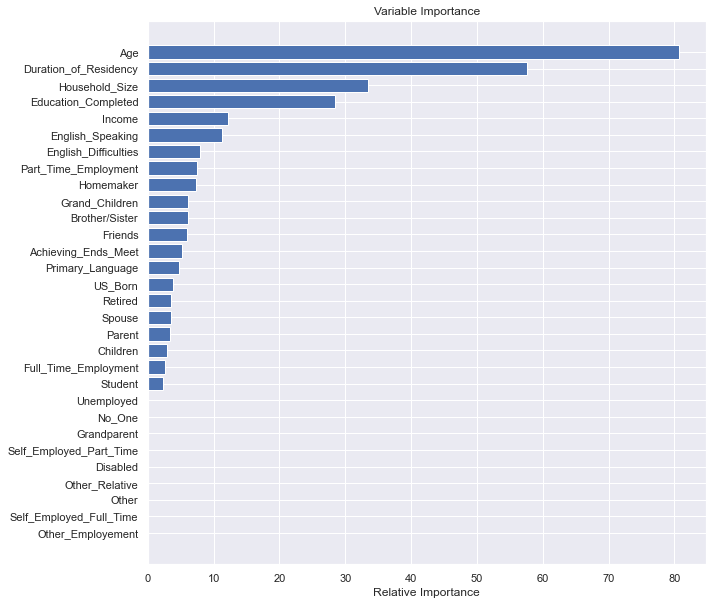

In [17]:
feature_importance = test_gb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.0.2 - trial 1 - Gradient Boosting with RandomizedSearchCV.png')

In [18]:
import csv
model_name = 'Model 4.0.2 - Gradient Boosting with RandomizedSearchCV'
values = [model_name,
          test_gb,
          np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
          metrics.mean_absolute_error(y_test, y_pred), 
          wall_clock]
out = csv.writer(open("Model 4.0.2 Performance Metrics - trial 1.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(values)

255